# Use of Scripts GPregressor and data_generators

In [3]:
# this will take us one layer up in the file path so that we can import our other modules
import sys
import os
sys.path.append(os.path.abspath(".."))

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 

# my packages
from GPregressor import GP_Regressor
from data_generators import Data 

## data_generation Options 

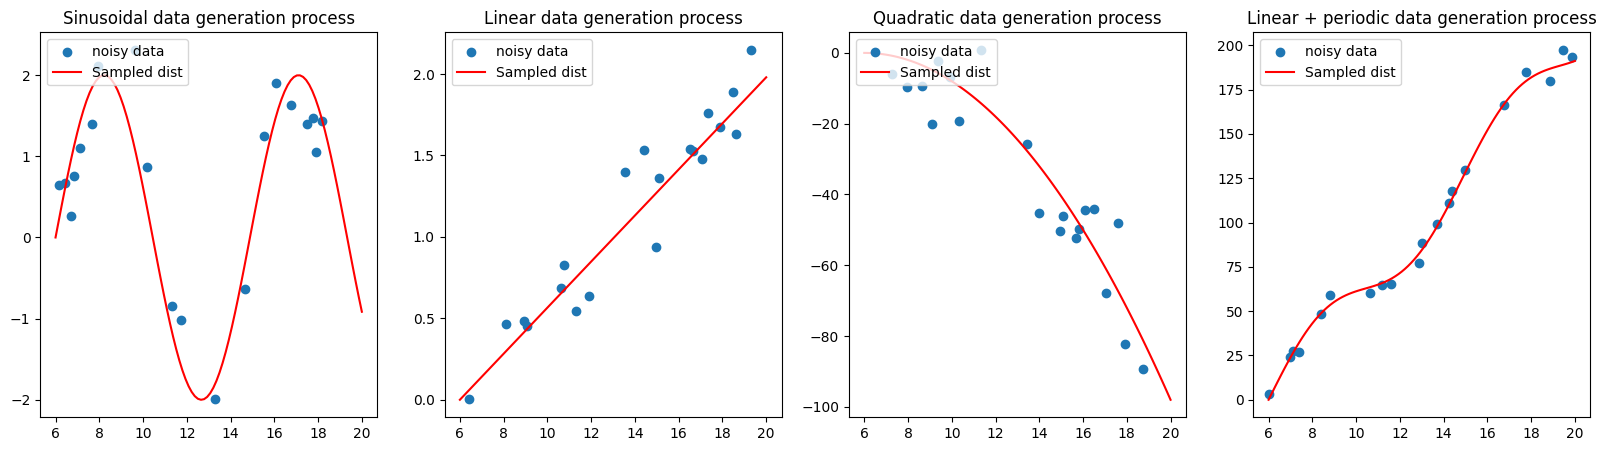

In [5]:
# we start by generating some synthetic data, displaying the variety of generations

data_oracle = Data(number_of_points = 20, bounds = [6,20])


sample_data_y_sinusoid, sample_data_x_sinusoid, true_data_y_sinusoid, true_data_x_sinusoid = data_oracle.sinusoid(noise = 0.5, period = 10)
sample_data_y_linear, sample_data_x_linear, true_data_y_linear, true_data_x_linear = data_oracle.linear(noise = 0.2, gradient = 0.02)
sample_data_y_quadratic, sample_data_x_quadratic, true_data_y_quadratic, true_data_x_quadratic = data_oracle.quadratic(noise =10, gradient = -0.01)
sample_data_y_linear_sinusoid, sample_data_x_linear_sinusoid, true_data_y_linear_sinusoid, true_data_x_linear_sinusoid = data_oracle.linear_sinusoid(noise = 5, gradient = 2, period = 0.1, amplitude=15)


fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].scatter(sample_data_x_sinusoid, sample_data_y_sinusoid, label = 'noisy data')
axes[0].plot(true_data_x_sinusoid, true_data_y_sinusoid, color = 'red', label = 'Sampled dist')
axes[0].set_title('Sinusoidal data generation process')
axes[0].legend(loc = 'upper left')


axes[1].scatter(sample_data_x_linear, sample_data_y_linear, label = 'noisy data')
axes[1].plot(true_data_x_linear, true_data_y_linear, color = 'red', label = 'Sampled dist')
axes[1].set_title('Linear data generation process')
axes[1].legend(loc = 'upper left')


axes[2].scatter(sample_data_x_quadratic, sample_data_y_quadratic, label = 'noisy data')
axes[2].plot(true_data_x_quadratic, true_data_y_quadratic, color = 'red', label = 'Sampled dist')
axes[2].set_title('Quadratic data generation process')
axes[2].legend(loc = 'upper left')



axes[3].scatter(sample_data_x_linear_sinusoid, sample_data_y_linear_sinusoid, label = 'noisy data')
axes[3].plot(true_data_x_linear_sinusoid, true_data_y_linear_sinusoid, color = 'red', label = 'Sampled dist')
axes[3].set_title('Linear + periodic data generation process')
axes[3].legend(loc = 'upper left')

plt.show()

## Fitting GP Regressors to each 

Given this synthetic data, we can fit a gp regressor to each one of them. Class has a built in plotter for each functionality, but you can also ask it to only return the values so you can plot yourself. 

In [6]:
# We start by initialising our gp regressor, with updated calling sequence which will allow malleability we want to plot a variety of cases. 
gp_tool = GP_Regressor([6, 20])

# Our priors are retrieved from the .priors method we have
sinusoidal_priors = gp_tool.priors(kernel = 'periodic', 
                                   prior_values=True, 
                                   period=15)
linear_priors = gp_tool.priors(kernel = 'linear', 
                               prior_values=True, 
                               var=15)
quadratic_priors = gp_tool.priors(kernel = 'quadratic', 
                                  prior_values=True, 
                                  var=15)
linear_and_sinusoidal_priors = gp_tool.priors(kernel = 'linear_plus_periodic', 
                                     prior_values = True, 
                                     amplitude=10, 
                                     var=5, 
                                     period = 15)

# now we find our posteriors using .regressor tool.
sinusoidal_posteriors = gp_tool.regressor(kernel = 'periodic', 
                                          line_values=True, 
                                          data_x=sample_data_x_sinusoid, 
                                          data_y=sample_data_y_sinusoid,
                                          period = 35, 
                                          amplitude = 3, 
                                          length = 1)

linear_posteriors = gp_tool.regressor(kernel = 'linear', 
                                      line_values=True, 
                                      data_x=sample_data_x_linear, 
                                      data_y=sample_data_y_linear,
                                      var = 5)         

quadratic_posteriors = gp_tool.regressor(kernel = 'quadratic', 
                                         line_values=True, 
                                         data_x=sample_data_x_quadratic, 
                                         data_y=sample_data_y_quadratic,
                                         var = 1, 
                                         noise = 15)       

linear_and_sinusoidal_posteriors = gp_tool.regressor(kernel = 'linear_plus_periodic', 
                                                     line_values=True, 
                                                     data_x=sample_data_x_linear_sinusoid, 
                                                     data_y=sample_data_y_linear_sinusoid,
                                                     var = 1, 
                                                     noise = 15, 
                                                     period = 25, 
                                                     amplitude=40)        

# now we find our posteriors using .regressor tool.
sinusoidal_posterior_regions = gp_tool.regressor(kernel = 'periodic', 
                                          area_values=True, 
                                          data_x=sample_data_x_sinusoid, 
                                          data_y=sample_data_y_sinusoid,
                                          period = 35, 
                                          amplitude = 3, 
                                          length = 1)

linear_posterior_regions = gp_tool.regressor(kernel = 'linear', 
                                      area_values=True, 
                                      data_x=sample_data_x_linear, 
                                      data_y=sample_data_y_linear,
                                      var = 5)         

quadratic_posterior_regions = gp_tool.regressor(kernel = 'quadratic', 
                                         area_values=True, 
                                         data_x=sample_data_x_quadratic, 
                                         data_y=sample_data_y_quadratic,
                                         var = 1, 
                                         noise = 15)       

linear_and_sinusoidal_posterior_regions = gp_tool.regressor(kernel = 'linear_plus_periodic', 
                                                     area_values=True, 
                                                     data_x=sample_data_x_linear_sinusoid, 
                                                     data_y=sample_data_y_linear_sinusoid,
                                                     var = 1, 
                                                     noise = 15, 
                                                     period = 25, 
                                                     amplitude=40)                  

KeyboardInterrupt: 

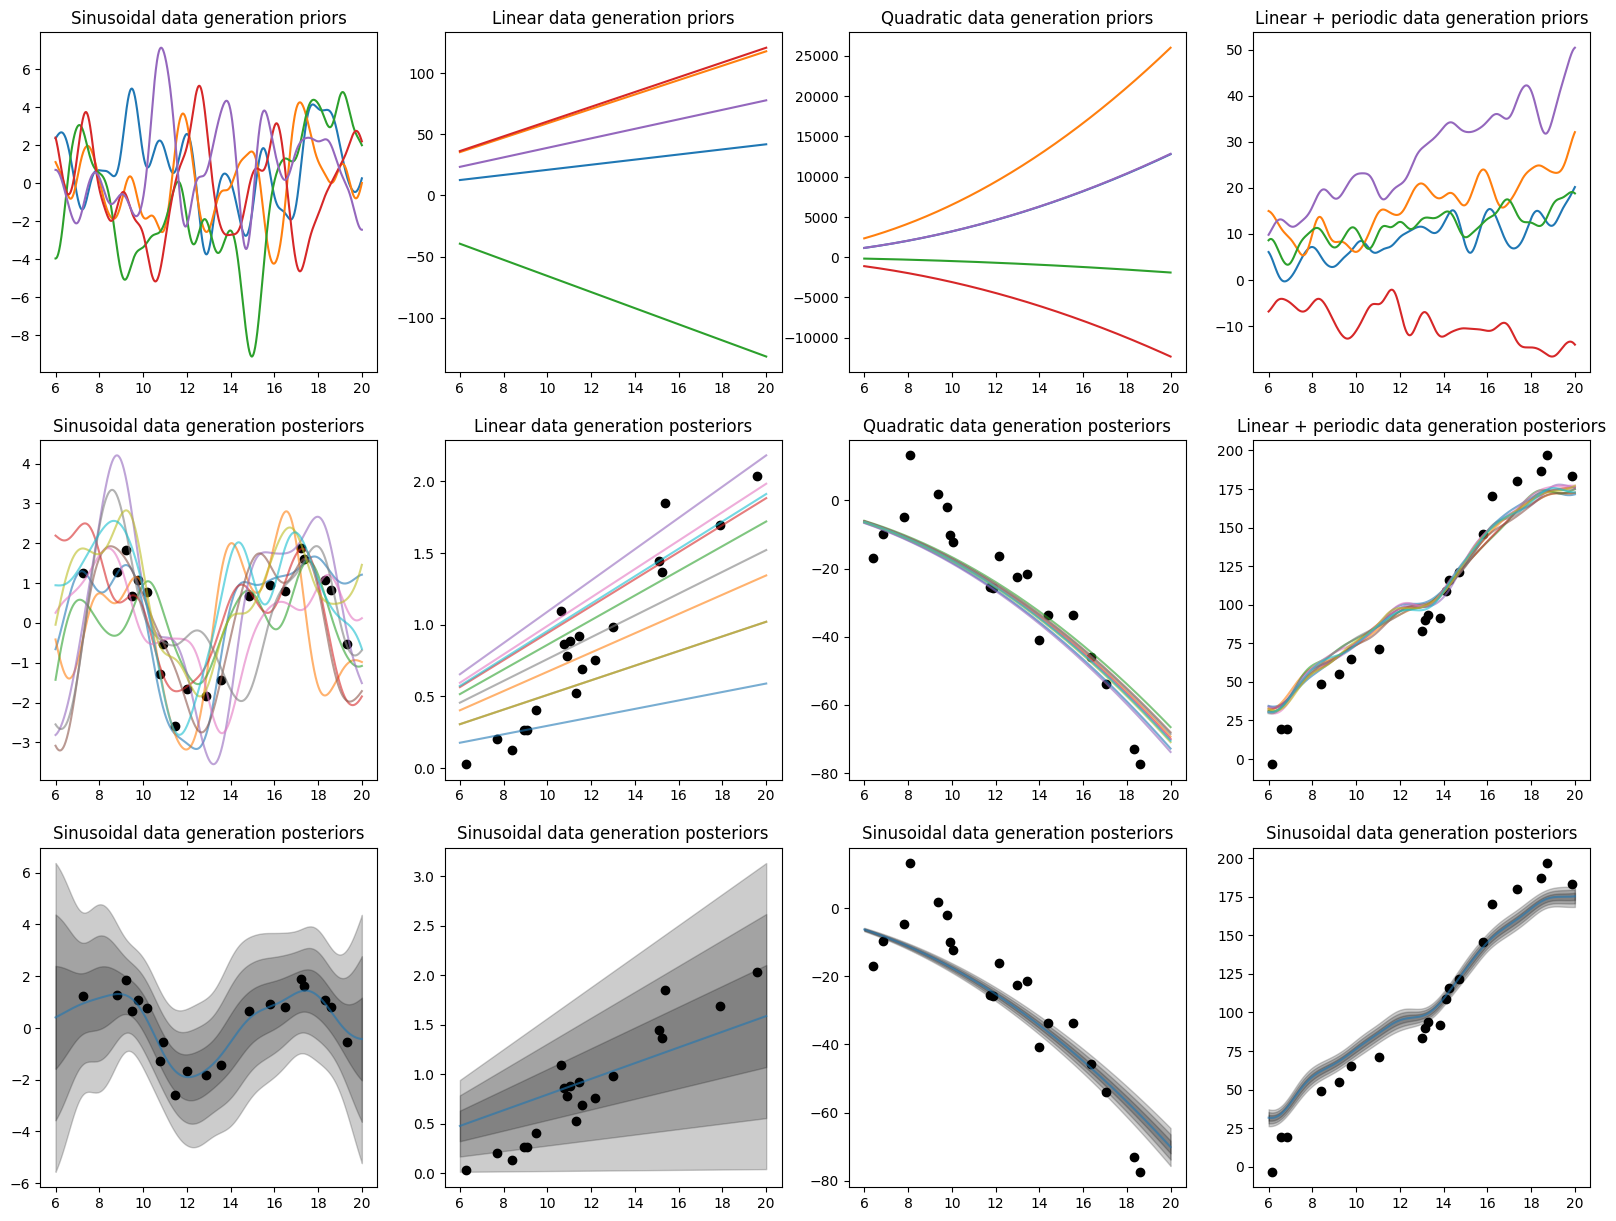

In [ ]:
# we now enter a massive figure 
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

##################################################
############## PLOTTING PRIORS ###################
##################################################
axes[0][0].plot(sinusoidal_priors['x_values'], sinusoidal_priors['samples'].T)
axes[0][0].set_title('Sinusoidal data generation priors')

axes[0][1].plot(linear_priors['x_values'], linear_priors['samples'].T)
axes[0][1].set_title('Linear data generation priors')

axes[0][2].plot(quadratic_priors['x_values'], quadratic_priors['samples'].T)
axes[0][2].set_title('Quadratic data generation priors')

axes[0][3].plot(linear_and_sinusoidal_priors['x_values'], linear_and_sinusoidal_priors['samples'].T)
axes[0][3].set_title('Linear + periodic data generation priors')

##################################################
############## PLOTTING POSTERIORS ###############
##################################################
axes[1][0].plot(sinusoidal_posteriors['x_values'], sinusoidal_posteriors['samples'].T, alpha = 0.6)
axes[1][0].scatter(sinusoidal_posteriors['input_x_data'], sinusoidal_posteriors['input_y_data'], color = 'black')
axes[1][0].set_title('Sinusoidal data generation posteriors')

axes[1][1].plot(linear_posteriors['x_values'], linear_posteriors['samples'].T, alpha = 0.6)
axes[1][1].scatter(linear_posteriors['input_x_data'], linear_posteriors['input_y_data'], color = 'black')
axes[1][1].set_title('Linear data generation posteriors')

axes[1][2].plot(quadratic_posteriors['x_values'], quadratic_posteriors['samples'].T, alpha = 0.6)
axes[1][2].scatter(quadratic_posteriors['input_x_data'], quadratic_posteriors['input_y_data'], color = 'black')
axes[1][2].set_title('Quadratic data generation posteriors')

axes[1][3].plot(linear_and_sinusoidal_posteriors['x_values'], linear_and_sinusoidal_posteriors['samples'].T, alpha = 0.6)
axes[1][3].scatter(linear_and_sinusoidal_posteriors['input_x_data'], linear_and_sinusoidal_posteriors['input_y_data'], color = 'black')
axes[1][3].set_title('Linear + periodic data generation posteriors')

##################################################
############### PLOTTING REGIONS #################
##################################################
axes[2][0].plot(sinusoidal_posterior_regions['x_values'], sinusoidal_posterior_regions['updated_mean'], alpha = 0.6)
axes[2][0].scatter(sinusoidal_posteriors['input_x_data'], sinusoidal_posteriors['input_y_data'], color = 'black')
axes[2][0].fill_between(sinusoidal_posterior_regions['x_values'], 
                        sinusoidal_posterior_regions['updated_mean'] - sinusoidal_posterior_regions['updated_std'], 
                        sinusoidal_posterior_regions['updated_mean'] + sinusoidal_posterior_regions['updated_std'], 
                        color="black", alpha=0.2, label="1σ")
axes[2][0].fill_between(sinusoidal_posterior_regions['x_values'], 
                        sinusoidal_posterior_regions['updated_mean'] - 2*sinusoidal_posterior_regions['updated_std'], 
                        sinusoidal_posterior_regions['updated_mean'] + 2*sinusoidal_posterior_regions['updated_std'], 
                        color="black", alpha=0.2, label="2σ")
axes[2][0].fill_between(sinusoidal_posterior_regions['x_values'], 
                        sinusoidal_posterior_regions['updated_mean'] - 3*sinusoidal_posterior_regions['updated_std'], 
                        sinusoidal_posterior_regions['updated_mean'] + 3*sinusoidal_posterior_regions['updated_std'], 
                        color="black", alpha=0.2, label="3σ")
axes[2][0].set_title('Sinusoidal data generation posteriors')



axes[2][1].plot(linear_posterior_regions['x_values'], linear_posterior_regions['updated_mean'], alpha = 0.6)
axes[2][1].scatter(linear_posteriors['input_x_data'], linear_posteriors['input_y_data'], color = 'black')
axes[2][1].fill_between(linear_posterior_regions['x_values'], 
                        linear_posterior_regions['updated_mean'] - linear_posterior_regions['updated_std'], 
                        linear_posterior_regions['updated_mean'] + linear_posterior_regions['updated_std'], 
                        color="black", alpha=0.2, label="1σ")
axes[2][1].fill_between(linear_posterior_regions['x_values'], 
                        linear_posterior_regions['updated_mean'] - 2*linear_posterior_regions['updated_std'], 
                        linear_posterior_regions['updated_mean'] + 2*linear_posterior_regions['updated_std'], 
                        color="black", alpha=0.2, label="2σ")
axes[2][1].fill_between(linear_posterior_regions['x_values'], 
                        linear_posterior_regions['updated_mean'] - 3*linear_posterior_regions['updated_std'], 
                        linear_posterior_regions['updated_mean'] + 3*linear_posterior_regions['updated_std'], 
                        color="black", alpha=0.2, label="3σ")
axes[2][1].set_title('Sinusoidal data generation posteriors')



axes[2][2].plot(quadratic_posterior_regions['x_values'], quadratic_posterior_regions['updated_mean'], alpha = 0.6)
axes[2][2].scatter(quadratic_posteriors['input_x_data'], quadratic_posterior_regions['input_y_data'], color = 'black')
axes[2][2].fill_between(quadratic_posterior_regions['x_values'], 
                        quadratic_posterior_regions['updated_mean'] - quadratic_posterior_regions['updated_std'], 
                        quadratic_posterior_regions['updated_mean'] + quadratic_posterior_regions['updated_std'], 
                        color="black", alpha=0.2, label="1σ")
axes[2][2].fill_between(quadratic_posterior_regions['x_values'], 
                        quadratic_posterior_regions['updated_mean'] - 2*quadratic_posterior_regions['updated_std'], 
                        quadratic_posterior_regions['updated_mean'] + 2*quadratic_posterior_regions['updated_std'], 
                        color="black", alpha=0.2, label="2σ")
axes[2][2].fill_between(quadratic_posterior_regions['x_values'], 
                        quadratic_posterior_regions['updated_mean'] - 3*quadratic_posterior_regions['updated_std'], 
                        quadratic_posterior_regions['updated_mean'] + 3*quadratic_posterior_regions['updated_std'], 
                        color="black", alpha=0.2, label="3σ")
axes[2][2].set_title('Sinusoidal data generation posteriors')



axes[2][3].plot(linear_and_sinusoidal_posterior_regions['x_values'], linear_and_sinusoidal_posterior_regions['updated_mean'], alpha = 0.6)
axes[2][3].scatter(linear_and_sinusoidal_posteriors['input_x_data'], linear_and_sinusoidal_posteriors['input_y_data'], color = 'black')
axes[2][3].fill_between(linear_and_sinusoidal_posterior_regions['x_values'], 
                        linear_and_sinusoidal_posterior_regions['updated_mean'] - linear_and_sinusoidal_posterior_regions['updated_std'], 
                        linear_and_sinusoidal_posterior_regions['updated_mean'] + linear_and_sinusoidal_posterior_regions['updated_std'], 
                        color="black", alpha=0.2, label="1σ")
axes[2][3].fill_between(linear_and_sinusoidal_posterior_regions['x_values'], 
                        linear_and_sinusoidal_posterior_regions['updated_mean'] - 2*linear_and_sinusoidal_posterior_regions['updated_std'], 
                        linear_and_sinusoidal_posterior_regions['updated_mean'] + 2*linear_and_sinusoidal_posterior_regions['updated_std'], 
                        color="black", alpha=0.2, label="2σ")
axes[2][3].fill_between(linear_and_sinusoidal_posterior_regions['x_values'], 
                        linear_and_sinusoidal_posterior_regions['updated_mean'] - 3*linear_and_sinusoidal_posterior_regions['updated_std'], 
                        linear_and_sinusoidal_posterior_regions['updated_mean'] + 3*linear_and_sinusoidal_posterior_regions['updated_std'], 
                        color="black", alpha=0.2, label="3σ")
axes[2][3].set_title('Sinusoidal data generation posteriors')
plt.show()